<a href="https://colab.research.google.com/github/aliceson89/MachineLearning/blob/main/ML_chapter_7_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **제7강 머신러닝으로 분류하기(1)**

# **3. k-NN 알고리즘 활용 실습**

**라이브러리 import**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 데이터를 수집합니다
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv") # padnas를 통해 csv 파일 로드

In [ ]:
df.head() # df의 상단부 데이터 반환

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [ ]:
df.Pos.value_counts() # df에서 Pos 데이터에서 유일한 값을 집계하여 반환

C     50
SG    50
Name: Pos, dtype: int64

**데이터 시각화**

**스틸, 2점슛 데이터 시각화**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


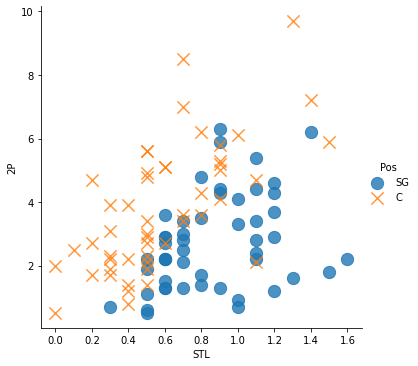

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('STL', '2P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"], # 그래프에 표기되는 point markers 모양 설정
           hue="Pos") # 예측값

**블로킹, 3점슛 데이터 시각화**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


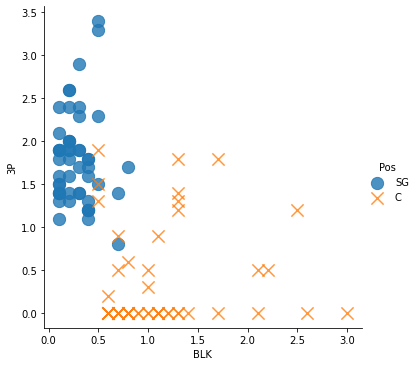

In [ ]:
sns.lmplot('BLK', '3P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"], # 그래프에 표기되는 point markers 모양 설정
           hue="Pos") # 예측값

**리바운드, 3점슛 데이터 시각화**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


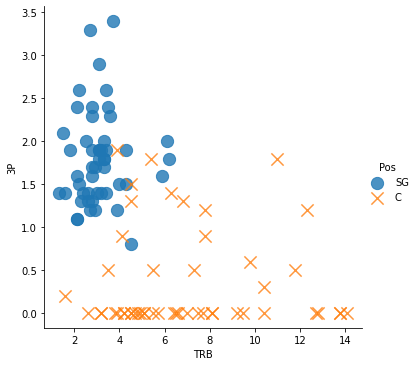

In [ ]:
sns.lmplot('TRB', '3P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"], # 그래프에 표기되는 point markers 모양 설정
           hue="Pos") # 예측값

**데이터 다듬기**

In [ ]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace = True) # 분별력이 없는 특징(feature)을 데이터에서 제거
df.head() # df의 상단부 데이터 반환

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


---------------------------------------------------------

**데이터 나누기**

In [ ]:
from sklearn.model_selection import train_test_split # sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있음

train, test = train_test_split(df, test_size=0.2) # 다듬어진 데이터에서 20%를 테스트 데이터로 분류

print(train.shape[0])# 학습 데이터의 갯수 확인
print(test.shape[0])# 테스트 데이터의 갯수 확인

80
20


**라이브러리 import**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5) # random seed를 5로 고정하여 반환되는 랜덤값이 변하지 않도록 설정

**최적의 kNN 파라미터 찾기**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0] // 2 # find best k, range from 3 to half of the number of data
k_list = [] # k_list 선언 및 초기화
for i in range(3, max_k_range, 2): # 3 ~ max_k_range 만큼 2씩 더한 값을 i에 대입하며 반복
    k_list.append(i) # i 값을 k_list에 추가
    #print(i)

#k_list

In [ ]:
cross_validation_scores = [] # cross_validation_scores 선언 및 초기화
x_train = train[['3P', 'BLK' , 'TRB']] # train에서 3P, BLK, TRB 데이터를 반환하여 x_train에 대입
y_train = train[['Pos']] # train에서 Pos 데이터를 반환하여 y_train에 대입

#print(x_train)
#print(y_train.values)
#print(y_train.values.ravel())

In [ ]:
for k in k_list:   # 10-fold cross validation
    knn = KNeighborsClassifier(n_neighbors=k) # neighbor를 k개 같는 KNeighborClssifier 선언
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),  # cross validation score 계산 (모델, 입력, 타겟), ravel 다차원배열을 1차원으로
                             cv=10, scoring='accuracy') # 10 fold로 설정, score는 accuracy로 계산
    cross_validation_scores.append(scores.mean()) # 전체 score의 평균값을 cross_validation_scroe에 추가

cross_validation_scores

[0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8,
 0.8]

**k의 변화에 따른 정확도 시각화**

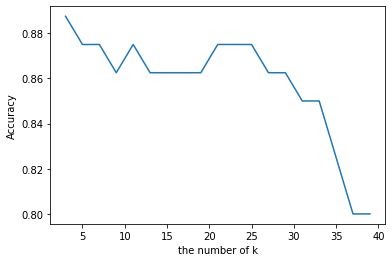

The best number of k : 3


In [ ]:
plt.plot(k_list, cross_validation_scores) # visualize accuracy according to k
plt.xlabel('the number of k') # x축 제목 설정
plt.ylabel('Accuracy') # y축 제목 설정
plt.show() # 그래프 출력
cvs = cross_validation_scores # cvs에 cross_validation_scores 대입
k = k_list[cvs.index(max(cross_validation_scores))] # cross_validation_score가 가장 높은 값의 index를 찾아 k_list에서 최적의 k값을 반환하여 대입
print("The best number of k : " + str(k) ) # str(k): 정수형 k를 문자열(string)으로 변환

**k-NN 모델 테스트**

In [ ]:
from sklearn.metrics import accuracy_score # scikit-learn에서 제공하는 accuracy를 계산하는 라이브러리

knn = KNeighborsClassifier(n_neighbors=k) # neighbor의 개수를 k개 갖는 KNeighborClassifier 선언

x_train = train[['3P', 'BLK', 'TRB']] # 학습에 사용될 속성을 지정
y_train = train[['Pos']] # 선수 포지션을 예측할 값으로 지정

knn.fit(x_train, y_train.values.ravel()) # setup knn using train data

x_test = test[['3P', 'BLK', 'TRB']] # select data feature to be used for prediction
y_test = test[['Pos']] # select target value
pred = knn.predict(x_test) # test
print("accuracy : "+  # check accuracy
          str(accuracy_score(y_test.values.ravel(), pred)) ) # 실제 타겟 데이터와 예측 값을 통해 정확도(accuracy)를 계산하고 이를 문자열(string)으로 변환

comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) # 예측값과 정답(ground truth) 데이터를 pandas dataframe으로 선언
comparison.head(10) # comparison의 상위 10개 데이터를 반환

accuracy : 0.95


,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


**이번 강의도 수고 많으셨습니다. 감사합니다.**